# K-Nearest Neighbors Classifier for Apple Quality Prediction

This notebook demonstrates a K-Nearest Neighbors (KNN) classifier to predict the quality of apples based on given features.
1. Load the data
2. Split and scale the data
3. Find the best value for k
4. Train and evaluate the model
5. Plot confusion matrix and ROC curve (if applicable)


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## 1. Load the Data


In [6]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.drop('Quality', axis=1).values
    y = df['Quality'].values
    return X, y

filepath = '../datasets/apple_quality_labels.csv'
X, y = load_data(filepath)


## 2. Split and Scale the Data


In [7]:
def split_and_scale_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_and_scale_data(X, y)


## 3. Find the Best Value for k


In [8]:
def find_best_k(X_train, y_train, k_range=range(1, 50)):
    cv_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    best_k = k_range[np.argmax(cv_scores)]
    return best_k, cv_scores

best_k, cv_scores = find_best_k(X_train, y_train)
print(f"Best k: {best_k}")


Best k: 9


### Plot Cross-Validation Accuracy


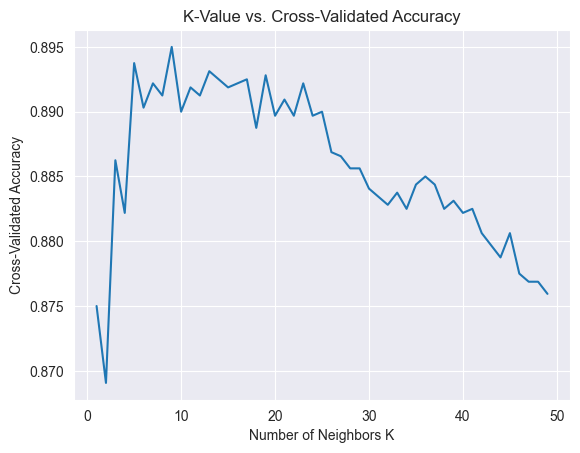

In [9]:
def plot_cross_validation_accuracy(k_values, cv_scores):
    plt.plot(k_values, cv_scores)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('K-Value vs. Cross-Validated Accuracy')
    plt.show()

plot_cross_validation_accuracy(range(1, 50), cv_scores)


## 4. Train and Evaluate the Model


In [10]:
def train_and_evaluate(X_train, X_test, y_train, y_test, best_k):
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)
    y_pred = best_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return best_knn, y_pred

best_knn, y_pred = train_and_evaluate(X_train, X_test, y_train, y_test, best_k)


Accuracy: 91.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       401
           1       0.91      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



## 5. Plot Confusion Matrix

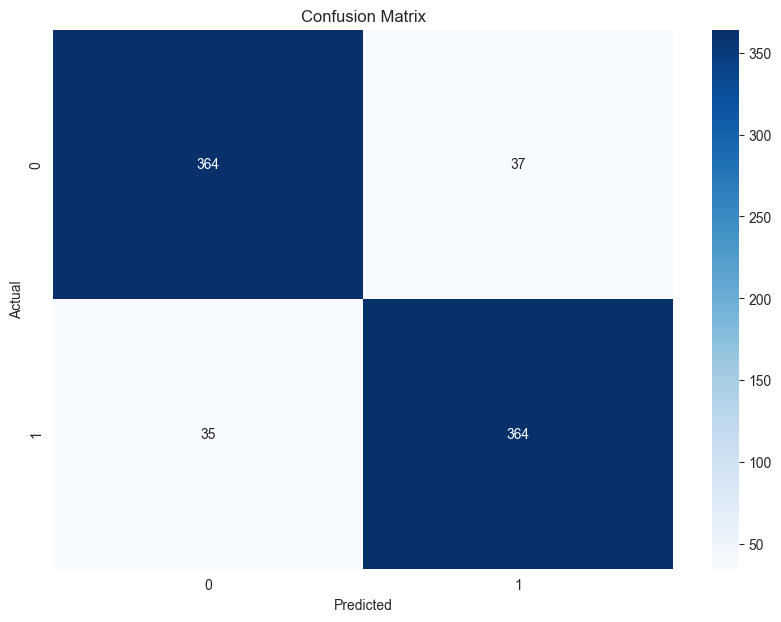

Confusion Matrix:
[[364  37]
 [ 35 364]]


In [11]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Confusion Matrix:")
    print(cm)

plot_confusion_matrix(y_test, y_pred)


## 6. Plot ROC Curve (if applicable)

ROC-AUC Score: 0.96


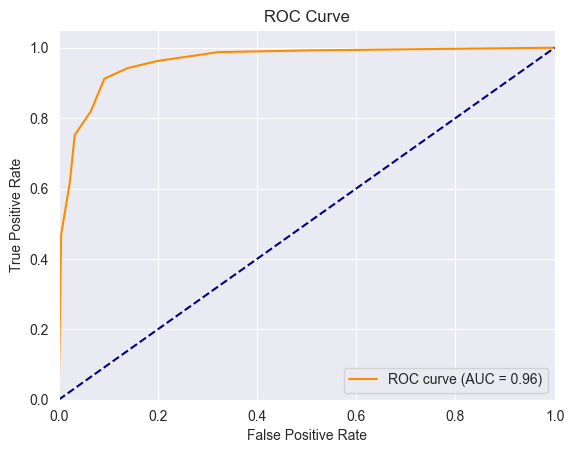

In [12]:
def plot_roc_curve(y_test, y_prob):
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_prob)

    plt.figure()
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

if len(np.unique(y)) == 2:  # Check if binary classification
    y_prob = best_knn.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_prob)
